In [2]:
from IPython.display import YouTubeVideo

# Introduction to Machine Learning

#### Bryan Scott, CIERA/Northwestern
version 0.1, August 2023

Presented at LSSTC Data Science Fellowship Program Session 19: Machine Learning


## Goals for the Lecture

Covering every ML technique, even in a popular library like scikit-learn would take much more than a week (or semester-long) session. That makes ML a very challenging subject to teach (or even introduce). 

As such, we'll focus on a bit of background with this talk. The learning goal for this talk is to provide some background for the week, and to (start to) answer the following questions:

- What is Machine Learning? How is different from statistics?
- Where did the field come from? Where is it going?
- When do we use Machine Learning and what are its limitations?

By the end of this talk, you should be able to 

- implement a classic Machine Learning algorithm and test it against real data. 
- articulate the limitations of a given Machine Learning model in terms of errors and uncertainties. 

## Pedagogical Framework

The pedagogical framework for this lecture is semi-active. I'll mostly be lecturing, but at a few points I'll ask you to discuss with your neighbor and share-back your thoughts. We'll then proceed to a hands-on tutorial implementing a ML algorithm on simulated data.

A fair word of warning - this talk will mirror the week, starting with some intuition but becoming a bit more technical towards the end. Unfortunately, the notation around some important results in ML gets a bit overwhelming, so if you find yourself lost place a bookmark to come back to the notation or let me know so we can review it! 

One note: I use $\textit{italics}$ to highlight new jargon or technical terms. 

The goal of today's lecture is to get intuition for applying these ideas throughout the week, not to focus on proving results! That's for later - we structure things this way so you'll have material to come back to and review as your research progresses in new directions.

## Further Resources

Machine Learning is an extremely active field. Some books that you might look at with increasing levels of sophistication:

- $\textit{Introduction to Machine Learning with Python}$, by Muller & Guido
- $\textit{Statistics, Data Mining, and Machine Learning in Astronomy}$, by Ivezić, Connolly, VanderPlas, and Gray
- $\textit{Machine Learning for Physics and Astronomy}$, by Acquaviva $\textbf{Tomorrow's Guest Lecturer!}$
- $\textit{Introduction to Statistical Learning}$, by James, Witten, Hastie & Tibshirani

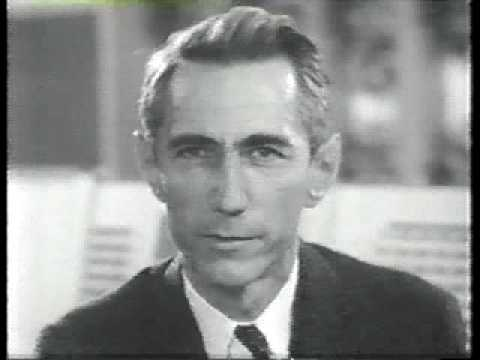

In [3]:
YouTubeVideo('aygSMgK3BEM', width=1200, height=900)

## What is Machine Learning?

<img src="images/statml.png" alt="drawing" width="1400"/>

## History

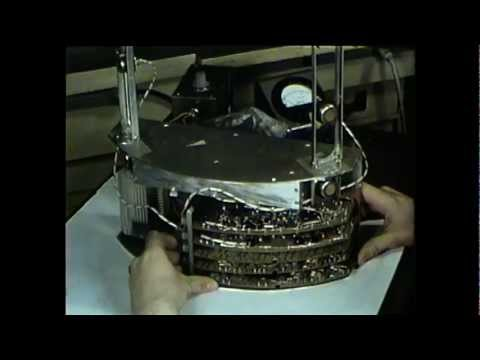

In [4]:
YouTubeVideo('zMpEeag7kkM', width=1200, height=900)

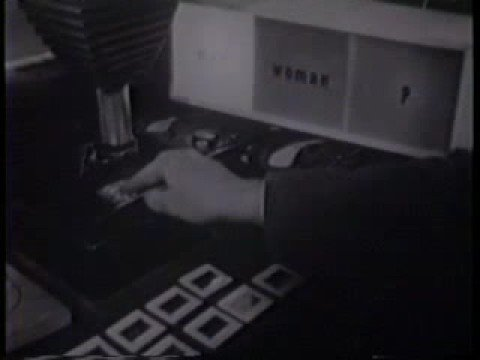

In [8]:
YouTubeVideo('cNxadbrN_aI', width=1200, height=900)

### When do you want to use Machine Learning?

$\textit{Discuss with your neighbor}$

When do we need machine learning? 

First, when a task is to complex to perform. That is, where it is
- hard to specify an algorithm for solving the problem
- the data is very large or complex

Second, tasks that require adaptivity
- where a task must change as a result of interaction with the environment

### Machine Learning Methods

In [20]:
import sklearn.cluster as cluster
import sklearn.ensemble as ensemble

In [24]:
dir(cluster)

['AffinityPropagation',
 'AgglomerativeClustering',
 'Birch',
 'DBSCAN',
 'FeatureAgglomeration',
 'KMeans',
 'MeanShift',
 'MiniBatchKMeans',
 'OPTICS',
 'SpectralBiclustering',
 'SpectralClustering',
 'SpectralCoclustering',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_affinity_propagation',
 '_agglomerative',
 '_bicluster',
 '_birch',
 '_dbscan',
 '_dbscan_inner',
 '_feature_agglomeration',
 '_hierarchical_fast',
 '_k_means_common',
 '_k_means_elkan',
 '_k_means_lloyd',
 '_k_means_minibatch',
 '_kmeans',
 '_mean_shift',
 '_optics',
 '_spectral',
 'affinity_propagation',
 'cluster_optics_dbscan',
 'cluster_optics_xi',
 'compute_optics_graph',
 'dbscan',
 'estimate_bandwidth',
 'get_bin_seeds',
 'k_means',
 'kmeans_plusplus',
 'linkage_tree',
 'mean_shift',
 'spectral_clustering',
 'ward_tree']

In [25]:
dir(ensemble)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'HistGradientBoostingClassifier',
 'HistGradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'StackingClassifier',
 'StackingRegressor',
 'VotingClassifier',
 'VotingRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bagging',
 '_base',
 '_forest',
 '_gb',
 '_gb_losses',
 '_gradient_boosting',
 '_hist_gradient_boosting',
 '_iforest',
 '_stacking',
 '_voting',
 '_weight_boosting']

## The (Formal) Structure of the Learning Problem

A Learning Problem consists of the following parts

$\mathit{X}$ - a domain set or instance space of examples. These are usually n-dimensional vectors. We call the components of these vectors, $\textit{features}$.

$\mathit{Y}$ - the label set, in supervised learning problems these are the set of possible $\textit{labels}$ for each element in $\mathit{X}$.

$\mathit{S}$ - the training set. These are ordered pairs of elements from $\mathit{X}$ and $\mathit{Y}$. 

For many problems, we additionally assume there is some true mapping $f: \mathit{X} \rightarrow \mathit{Y}$. These problems are called $\textit{supervised learning}$.

### Formally, the learning problem is to learn, estimate, or approximate the true map $\mathit{f}$ from the data.

We therefore distinguish between f and the output of the learner h, which is (at best) an approximation of f. 

$\mathit{h}$ - the output of some learning algorithm. This is a prediction rule that tells us Y given some X. $\mathit{h}: \mathit{X} \rightarrow  \mathit{Y}$

To review, the formal structure of a (supervised) learning problem consists of sets, X, Y, and S. Our goal is to learn a function from X $\rightarrow$ Y from observed instances of ordered pairs X, Y. These observed instances are S - the training set.

## Example: Labelling Fruit

<img src="images/representative.png" alt="drawing" width="1000"/>

## Loss Functions

To enable learning, we will need a function, called a $\textit{loss function}$, that tells us how wrong we are. Big values of the loss mean we're very wrong while small values mean we're less wrong. 

A common loss function is the mean squared error: 

$$
L_S(h) = \frac{1}{m} \Sigma |h(x) - y(x)|^2
$$

for an estimator h, and features x for m training points $\in$ S. Other loss functions exist, such as the $\textit{absolute error}$ (rather than mean squared error), $\textit{0-1 loss}$ (0 if the prediction of h is false, 1 if true; for binary classification problems), etc. 

For every distribution you sample data from, is it possible to construct an algorithm such that for any dataset of size m, you can gurantee with high confidence that the loss will be small? ($\textit{Discuss with your neighbor})$

## No Free Lunch Theorem

No, this is not possible due to a result called the "No Free Lunch Theorem" which (intuitively) states that a learning algorithm observing a subset of the instance spaces can learn a function that fits the subset but will fail on the unobserved half. 

That means there is no universal learning function that can be applied to all problems.

## Bayes Optimal Decision Rules and Bayes Classifiers

As we have just seen, for real problems, we don't know the distribution the data is sampled from and this prevents us from having a 'free lunch'. Nonetheless, we can draw some important insights into selecting the learned function h by considering the expected loss (or risk) computed with respect to the true $\textit{joint distribution}$:

The expectation value of the loss, or the risk $r$, is:

$$
r(h(X)) = \int \int L(h(X), Y) p(X, Y) dY dX
$$

A higher value of the loss means that our learned function h(X) is doing a poor job of predicting the values of Y. We therefore want to treat this as a minimization problem for h(X). Our best choice of h(X) is the one that minimizes the risk. 

Typically, we take one additional step of rewriting this in terms of the conditional distribution:  

$$
r(h(X)) = \int \left[\int L(h(X), Y) p(Y|X) dY \right] p(X) dX
$$

where the term in brackets is smallest for the "optimal choice" of loss function $L(h(X), Y)$. We can therefore pick the optimal h(X) for a given loss function by minimizing the term in brackets. 

People who have seen Bayesian inference before should recognize p(Y|X) is the $\textit{posterior}$ distribution for Y conditioned on X. Unfortunately, we don't know the posterior distribution for real problems. Nonetheless, we can, for example, make use of this approach to arrive at some useful results. One example is in the case of binary classification, we set $h(X) = argmax_a p(Y=a | X)$, in other words, the mode of the conditional posterior distribution $p(Y=a | X)$. 

This is an example of a Bayes Classifier. We'll study this more in the tutorial. 

## Why is Learning difficult?

A few reasons:
- in general, the true function $\mathit{f}$ could be very complicated and non-linear. 
- more generally, we don't know what model generated the dataset X. We assume it is sampled from some distribution $\mathit{X} \sim \mathscr{D}$, where we do not have access to $\mathscr{D}$.

### Taken together, this means we have to think carefully about our uncertainties on the outputs of learning algorithms.

## Uncertainty in Machine Learning

We can decompose the error on our estimate of the function h into two parts:

- $\epsilon_{app}$: the approximation error that arises from our learner not being 'perfect', or in other words, from the fact that $\mathit{h} \ne \mathit{f}$ in general
- $\epsilon_{est}$: the estimation error that arises from $\mathit{X} \sim \mathscr{D}$.

Our estimator for our learning error is a combination of both terms. Importantly, it is estimated from the training data $S \sim \mathit{X} \sim \mathscr{D}$, which means that the error is itself a random variable.

## What can we do about our learning errors?

As an example, we generally want a rich set of possible functions $\mathit{h}$ to learn from. This decreases the $\epsilon_{app}$ since we can pick better (less biased) $\textit{h}$ than we could with a smaller set of functions to pick from, however $\epsilon_{est}$ increases (the variance increases) with how complicated our set of possible $\mathit{h}$ is.

This is called the $\textit{bias-variance tradeoff}$. In statistics, there is a formal limit on the bias and variance called the $\textit{Cramer-Rao } bound$.


## Cramer-Rao Bound: A brief interlude...

Suppose you have data X sampled from some distribution $Pr(\theta)$. If $\theta$ is estimated by some function of the data T(X), then the variance and bias of estimates are related by

$$
Var(T(X)) \ge \frac{\left(\frac{d}{d\theta} \mathbb{E}\left(T(x)\right)\right)^2}{\mathbb{E} \left(\frac{d}{d\theta} log f\left(X; \theta \right)\right)^2}
$$

The left side is the variance - while the right side depends on whether the estimate of $\theta$ is biased. If it's unbiased, the expectation is $\theta$ and the numerator is one. The denominator is a term called the Fisher information - which tells you how sensitive to the likelihood function is to changes in its parameters.

## Putting it all together - Probably Approximately Correct (PAC) Learning 

What we've seen so far is that machine (or statistical) learning methods:

- There is error due to failures of the learner, parameterized as $\epsilon$. 
- There is error due to sampling from some unknown distribution, $S \sim \mathit{X} \sim \mathscr{D}$, parameterized as $\delta$. 

This leads to a definition of the learning problem in terms of $\textit{probably}$ ($\delta$) $\textit{approximately}$ ($\epsilon$) $\textit{correct}$ (PAC) learning. Probably captures the sampling of the data and approximately captures errors in our learning. This notion of PAC learnability allows you to make quantitative statements about, for example, how large a training set you need given how many possible functions you want to learn from the data. 

PAC learnability is a very common, but not the only, framework for discussing statistical/machine learning methods.

## Worry about the Data! 

Sophisticated techniques for reducing errors in the learner ($\epsilon$) exist. We'll see many of them this week. Dealing with errors in the training sample - also called non-representativeness - are much more subtle. If our training data is biased, so will our inferences from that data! 

<img src="images/not-representative.png" alt="drawing" width="1000"/>

## Topics we'll cover this week:

- Day 1: Unsupervised Machine Learning and Dimensionality Reduction
- Day 2: Supervised and Ensemble Learning
- Day 3: Convolutional Neural Networks
- Day 4: Graph and Reinforcement Learning
- Day 5: Reinforcement Learning (cont).

Some topics there wasn't time for are $\textit{Autoencoders}$, $\textit{Probablistic Machine Learning}$, and $\textit{Transformer Models}$. These might make for interesting hack day projects! 

## What's next? The tutorial! 

In part 1 of the tutorial, you'll implement a simple learner called a Bayes classifier. Cohort 6 should recognize the approach in terms of concepts we learned at session 16. For cohort 7, this is related to the "Bayes optimal predictors" we discussed in this lecture. The Bayes classifier is a good baseline to compare other approaches to and is more straightforward than some other approaches (deep neural networks, anyone?). 

In part 2 of the tutorial, I'll walk you through proving the Cramer-Rao bound. Although not solely/directly an ML concept, it's good intuition for many problems you'll encounter. 

Something new for session 19 - we'll ask you at various points in the next hour to take a work break and discuss what you've been doing with your partners. 

In the meantime, as always, I'll be around to help out! 